# Ford GoBike System Data
## by Abdelrahman Mohammed

## Investigation Overview

I am mainly interested in which bike types are more likely to be rented, Trip Durations, and types of users

## Dataset Overview

Data is originally composed of 152446 rows and  13 columns. I drop 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng' since they are irrelevent to my investigation. Moreover, I drop all the null values. Thus, I am left with 84114 rows and , 7 columns. Finally I derive duration of the trip from hte start and end time of the trip and the day time from the start time and add column hour which is the hour at which the bike is rented. Hence, the main features are 

- id of trip
- type of bike (electric/docked)
- start time of the trip
- end time of the trip
- start station
- End station
- duration of trip
- day time
- hour


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv("data_presentation.csv")
data.head()

,id,type,start_time,end_time,start_station,end_station,member,duration,day_time,hour
0,33B224625CF1BC63,electric_bike,2020-08-14 09:13:54,2020-08-14 09:20:29,23rd St at Tennessee St,Jackson Playground,casual,6,Morning,9
1,053D5F7D1AC11423,electric_bike,2020-08-14 11:26:54,2020-08-14 11:29:17,Broderick St at Oak St,Pierce St at Haight St,casual,2,Morning,11
2,A5992287F89D948E,electric_bike,2020-08-13 17:14:42,2020-08-13 17:34:14,Laurel St at California St,Alamo Square (Steiner St at Fulton St),casual,19,Afternoon,17
3,34DB4E0EB5BDC906,electric_bike,2020-08-14 13:40:11,2020-08-14 13:57:48,Duboce Park,Hubbell St at 16th St,casual,17,Afternoon,13
4,2F476E1A0011B2CC,electric_bike,2020-08-14 07:13:54,2020-08-14 07:18:42,Hubbell St at 16th St,Folsom St at 7th St,casual,4,Morning,7


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

>the day time at which the bikes are used is Afternoon, then Evening. while After midnight is the lowest

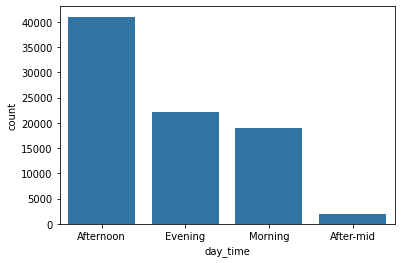

In [3]:
day_time_counts = data.day_time.value_counts().index
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'day_time', order = day_time_counts, color = base_color)

## (Visualization 2)

> Casual members are more likely to use the service than the registered ones (members)

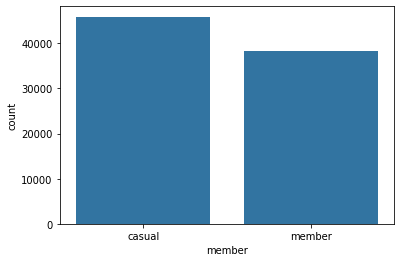

In [4]:
members_types = data.member.value_counts().index
base_color = sb.color_palette()[0]
ax = sb.countplot(data = data, x = 'member', order = members_types, color = base_color)

## (Visualization 3)

> Distribution of the histogram of duration is unimodal with the mode at nearly 12 minutes!

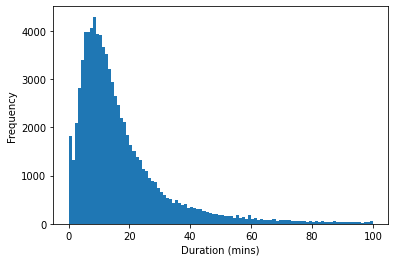

In [5]:
# Zoom in desired interval
bins = np.arange(0, 101, 1) # step = 1 min since duration is in minutes, no fractions!
plt.hist(data = data, x = 'duration', bins = bins);
plt.xlabel("Duration (mins)");
plt.ylabel("Frequency");

## (Visualization 4)
 
    
> Casual members are more likely to use the service. The Average trip duration is higher form them than those registered members

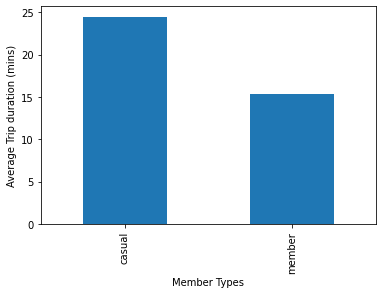

In [6]:
dist = data.groupby('member').duration.mean().plot('bar');
plt.ylabel("Average Trip duration (mins)");
plt.xlabel("Member Types");

## (Visualization 5)
 
    
> This violin plot gives an explanation for why average trip duration is higher for casual users. Despite the plot is wider for registered members (more trips), they are concentrated at < 20 mins.

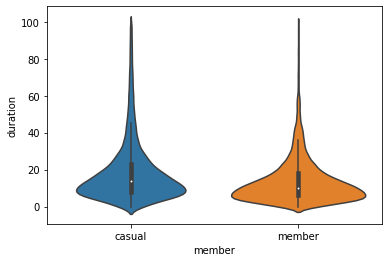

In [7]:
data_sub = data[data.duration < 100]
sb.violinplot(data = data_sub, x = 'member', y = 'duration');

## (Visualization 6)
 
    
> Registered members behaviour is consistent Vs Day times. They tend to make more trips but short ones

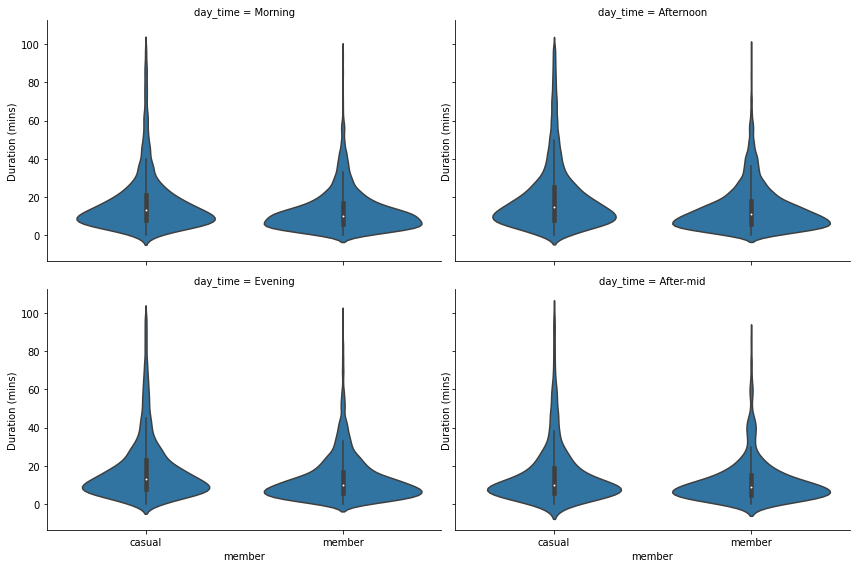

In [8]:
data_sub = data[data.duration < 100]
g = sb.FacetGrid(data = data_sub, col = "day_time", col_wrap = 2, size = 4, aspect = 1.5)
g.map(sb.violinplot, 'member', 'duration');
for ax in g.axes.flat:
    ax.set_ylabel("Duration (mins)");